In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
cc17pu = pd.read_csv('monthly_pu_df2017.csv',index_col='PULocationID')
cc18pu = pd.read_csv('monthly_pu_df2018.csv',index_col='PULocationID')

In [4]:
cc_p = pd.concat([cc17pu,cc18pu],axis=1)

In [7]:
cc_p.fillna(0,inplace=True)

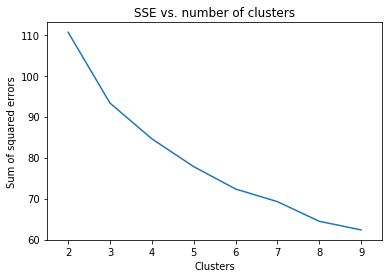

In [8]:
SSE = []
for i in range(2,10):
    km = KMeans(n_clusters = i)
    res=km.fit(cc_p)
    SSE.append(res.inertia_)


plt.gca()
plt.plot(range(2,10),SSE)
plt.xlabel("Clusters")
plt.ylabel("Sum of squared errors")
plt.title("SSE vs. number of clusters")
plt.xlim(1.5,9.5)
plt.show()

In [10]:

kmeans_3 = KMeans(n_clusters=8,random_state=100).fit(cc_p)

In [11]:
cc_p['k3_labels'] = kmeans_3.labels_

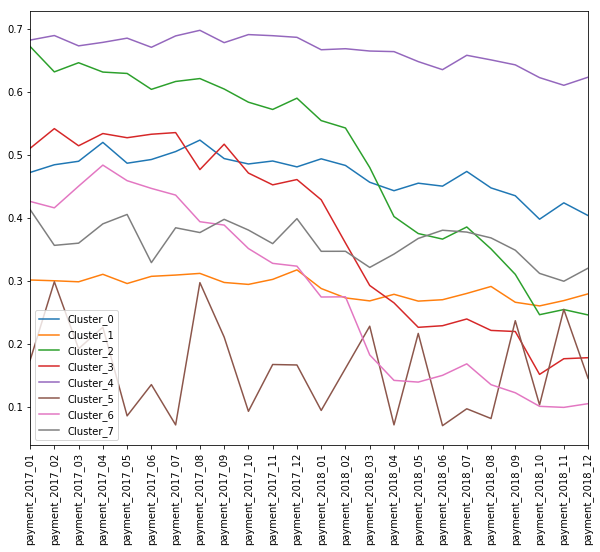

In [12]:
fig,ax = plt.subplots(figsize=(10,8))

cc_p[cc_p['k3_labels']== 0 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_0')
cc_p[cc_p['k3_labels']== 1 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_1')
cc_p[cc_p['k3_labels']== 2 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_2')
cc_p[cc_p['k3_labels']== 3 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_3')
cc_p[cc_p['k3_labels']== 4 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_4')
cc_p[cc_p['k3_labels']== 5 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_5')
cc_p[cc_p['k3_labels']== 6 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_6')

cc_p[cc_p['k3_labels']== 7 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_7',xticks=[i for i in range(0,24)],rot=90)
plt.legend()

In [13]:
import geopandas as gpd

In [14]:
gdf = gpd.GeoDataFrame.from_file('taxi_zones.shp')

In [15]:
gdf.set_index('OBJECTID',inplace=True)

In [16]:
merged_gdf = gdf.merge(cc_p[['k3_labels']],left_index=True, right_index=True)

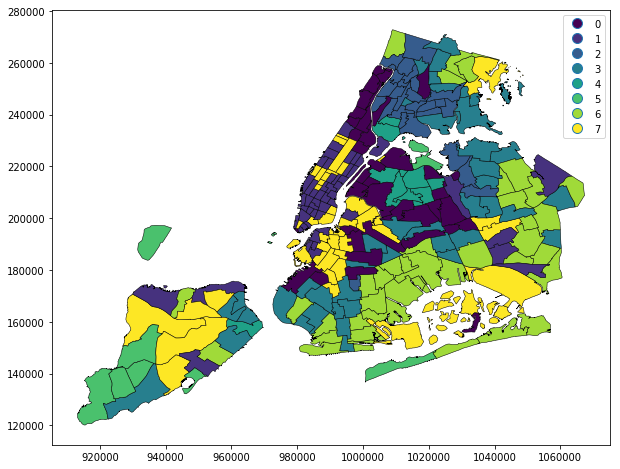

In [17]:
fig,ax = plt.subplots(figsize=(10,8))
merged_gdf.plot(ax=ax, column='k3_labels',cmap='viridis',figsize=(20,20),legend=True,label='clusters',edgecolor='black' ,linewidth=0.5,categorical=True)


In [18]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
# Choose a range of cluster numbers that you would like to evalulate:
range_n_clusters = range(2,10)
Z = linkage(cc_p.loc[:,"payment_2017_01":"payment_2018_12"], 'single')

for n_clusters in range_n_clusters:
    cluster_labels=fcluster(Z, n_clusters, criterion='maxclust')    
    silhouette_avg = silhouette_score(cc_p.loc[:,"payment_2017_01":"payment_2018_12"], cluster_labels)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.5616108440315399
For n_clusters = 3, the average silhouette_score is : 0.5204163653158612
For n_clusters = 4, the average silhouette_score is : 0.515310711443402
For n_clusters = 5, the average silhouette_score is : 0.4817489291255504
For n_clusters = 6, the average silhouette_score is : 0.46805806138006456
For n_clusters = 7, the average silhouette_score is : 0.4343811436531798
For n_clusters = 8, the average silhouette_score is : 0.41709447309380787
For n_clusters = 9, the average silhouette_score is : 0.41866556575236363


In [19]:
Z = linkage(cc_p.loc[:,"payment_2017_01":"payment_2018_12"], 'single')
cluster_labels_sl=fcluster(Z, 2, criterion='maxclust')   


In [20]:
cc_p['sl_cluster'] = cluster_labels_sl


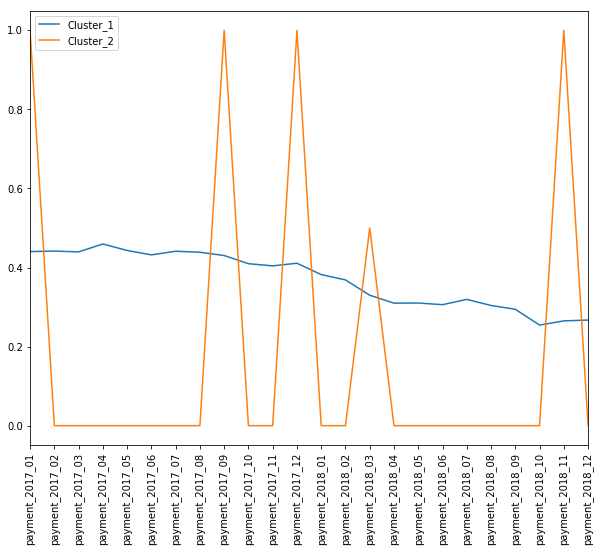

In [21]:
fig,ax = plt.subplots(figsize=(10,8))

cc_p[cc_p['sl_cluster']== 1 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_1')

cc_p[cc_p['sl_cluster']== 2 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_2',xticks=[i for i in range(0,24)],rot=90)
plt.legend()


In [22]:
merged_gdf = gdf.merge(cc_p[['sl_cluster']],left_index=True, right_index=True)

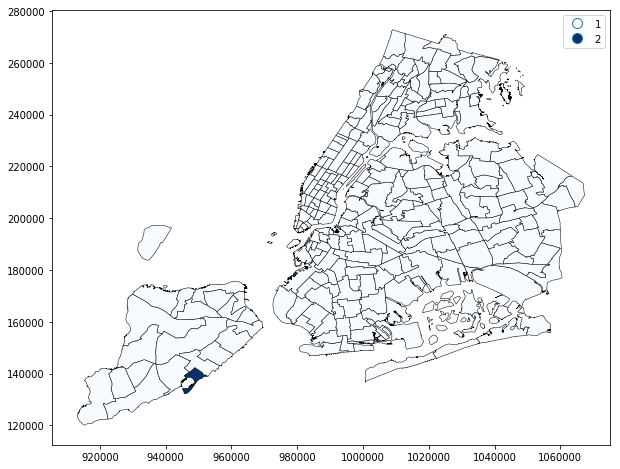

In [23]:
fig,ax = plt.subplots(figsize=(10,8))
merged_gdf.plot(ax=ax, column='sl_cluster',cmap='Blues',figsize=(20,20),legend=True,label='clusters',edgecolor='black' ,linewidth=0.5,categorical=True)


In [24]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
# Choose a range of cluster numbers that you would like to evalulate:
range_n_clusters = range(2,10)
Z = linkage(cc_p.loc[:,"payment_2017_01":"payment_2018_12"], 'complete')

for n_clusters in range_n_clusters:
    cluster_labels=fcluster(Z, n_clusters, criterion='maxclust')    
    silhouette_avg = silhouette_score(cc_p.loc[:,"payment_2017_01":"payment_2018_12"], cluster_labels)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.3336510276208217
For n_clusters = 3, the average silhouette_score is : 0.28090903560243907
For n_clusters = 4, the average silhouette_score is : 0.2659756585401077
For n_clusters = 5, the average silhouette_score is : 0.25399877115172764
For n_clusters = 6, the average silhouette_score is : 0.25920355774833964
For n_clusters = 7, the average silhouette_score is : 0.26630244214813054
For n_clusters = 8, the average silhouette_score is : 0.22021142173441288
For n_clusters = 9, the average silhouette_score is : 0.19231429622069543


In [25]:
Z = linkage(cc_p.loc[:,"payment_2017_01":"payment_2018_12"], 'complete')
cluster_labels=fcluster(Z, 2, criterion='maxclust')   


In [26]:
cc_p['cl_cluster'] = cluster_labels


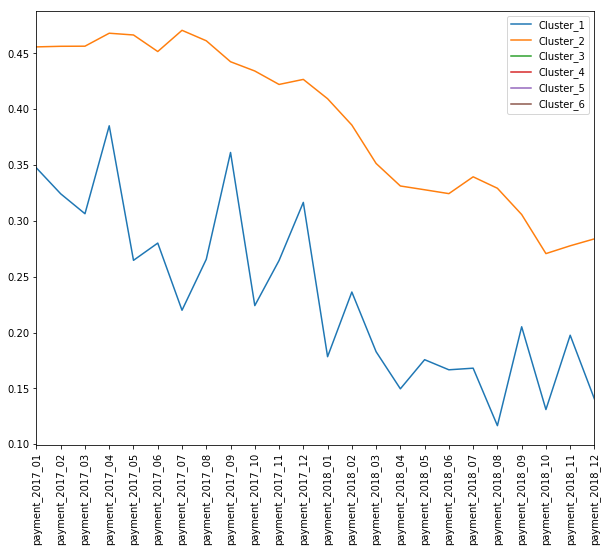

In [27]:
fig,ax = plt.subplots(figsize=(10,8))

cc_p[cc_p['cl_cluster']== 1].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_1')
cc_p[cc_p['cl_cluster']== 2 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_2')
cc_p[cc_p['cl_cluster']== 3 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_3')
cc_p[cc_p['cl_cluster']== 4 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_4')
cc_p[cc_p['cl_cluster']== 5 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_5')
cc_p[cc_p['cl_cluster']== 6 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_6',xticks=[i for i in range(0,24)],rot=90)
plt.legend()


In [28]:
merged_gdf = gdf.merge(cc_p[['cl_cluster']],left_index=True, right_index=True)

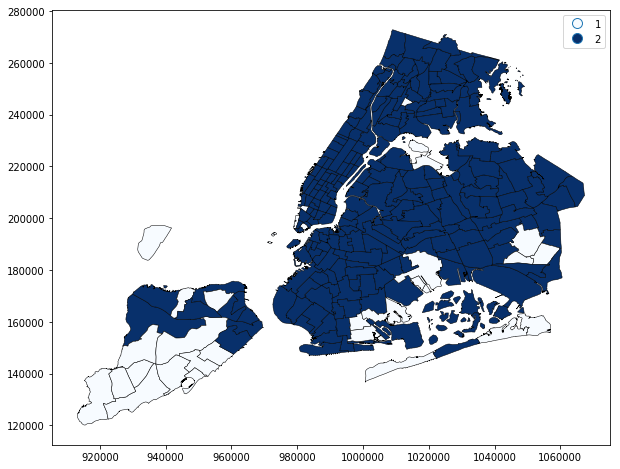

In [30]:
fig,ax = plt.subplots(figsize=(10,8))
merged_gdf.plot(ax=ax, column='cl_cluster',cmap='Blues',figsize=(20,20),legend=True,label='clusters',edgecolor='black' ,linewidth=0.5,categorical=True)


In [31]:
import sklearn.mixture as sm
from scipy import linalg
import matplotlib as mpl

In [32]:
n_components = np.arange(2,10)
models = [sm.GMM(n, covariance_type='full', random_state=0).fit(cc_p.loc[:,"payment_2017_01":"payment_2018_12"])
          for n in n_components]

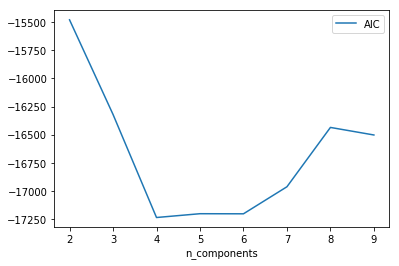

In [33]:
plt.plot(n_components, [m.aic(cc_p.loc[:,"payment_2017_01":"payment_2018_12"]) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [34]:
labels_gmm = sm.GMM(4, covariance_type='full', random_state=0).fit(cc_p.loc[:,"payment_2017_01":"payment_2018_12"]).predict(cc_p.loc[:,"payment_2017_01":"payment_2018_12"])

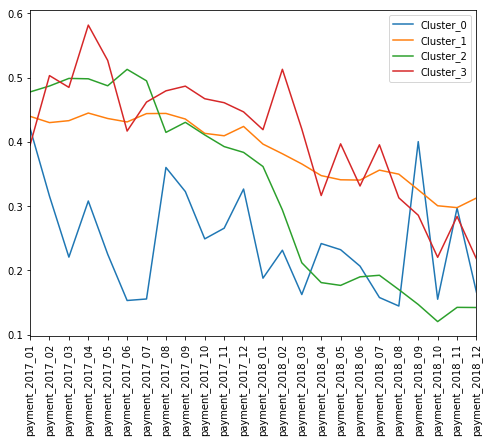

In [35]:
cc_p['gmm_labels'] = labels_gmm
fig,ax = plt.subplots(figsize=(8,6))
cc_p[cc_p['gmm_labels']==0].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_0')
cc_p[cc_p['gmm_labels']==1].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_1')
cc_p[cc_p['gmm_labels']==2].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_2')

cc_p[cc_p['gmm_labels']==3].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_3',xticks=[i for i in range(0,24)],rot=90)

plt.legend()

In [36]:
merged_gdf = gdf.merge(cc_p[['gmm_labels']],left_index=True, right_index=True)

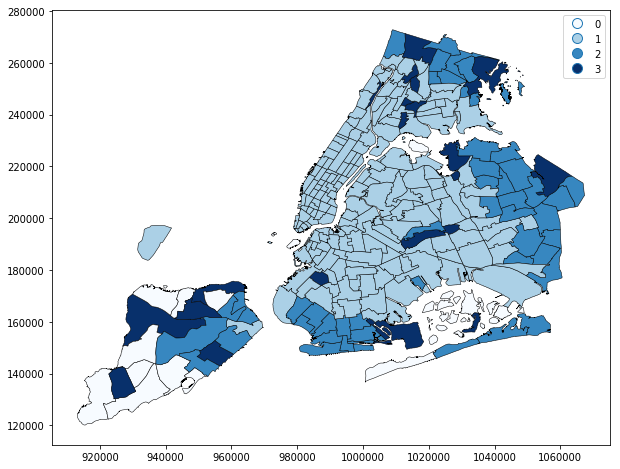

In [37]:
fig,ax = plt.subplots(figsize=(10,8))
merged_gdf.plot(ax=ax, column='gmm_labels',cmap='Blues',figsize=(20,20),legend=True,label='clusters',edgecolor='black' ,linewidth=0.5,categorical=True)
